# Change detection and raster vectorization - test file 1

<b>1. VECTOR REPROJECTION FUNCTION</b>
* Clip rasters / problem of extent.
* Calculate NDVI.
* Divide raster into quadrants / problem of scale.
* Monitor NDVI changes in each quadrant (time series).
* Locate time with abrupt changes in NDVI value.
* Check quadrant neighbours then check values pixel by pixel.
* Clip AoI / AoI statistics.
* Vectorize AoI.
* Monitor AoI.

In [1]:
%matplotlib notebook
import numpy as np
import rasterio as rio
import fiona as fio
from fiona.crs import from_epsg
from pyproj import Proj, transform
import matplotlib.pyplot as plt

In [38]:
def show_band(band, color_map='gray', remove_negative=True):
    matrix = band.astype(float)
    if remove_negative:
        matrix[matrix <= 0] = np.nan
    fig = plt.figure(figsize=(11,11))
    image_layer = plt.imshow(matrix)
    image_layer.set_cmap(color_map)
    plt.colorbar()
    plt.show()

<IPython.core.display.Javascript object>


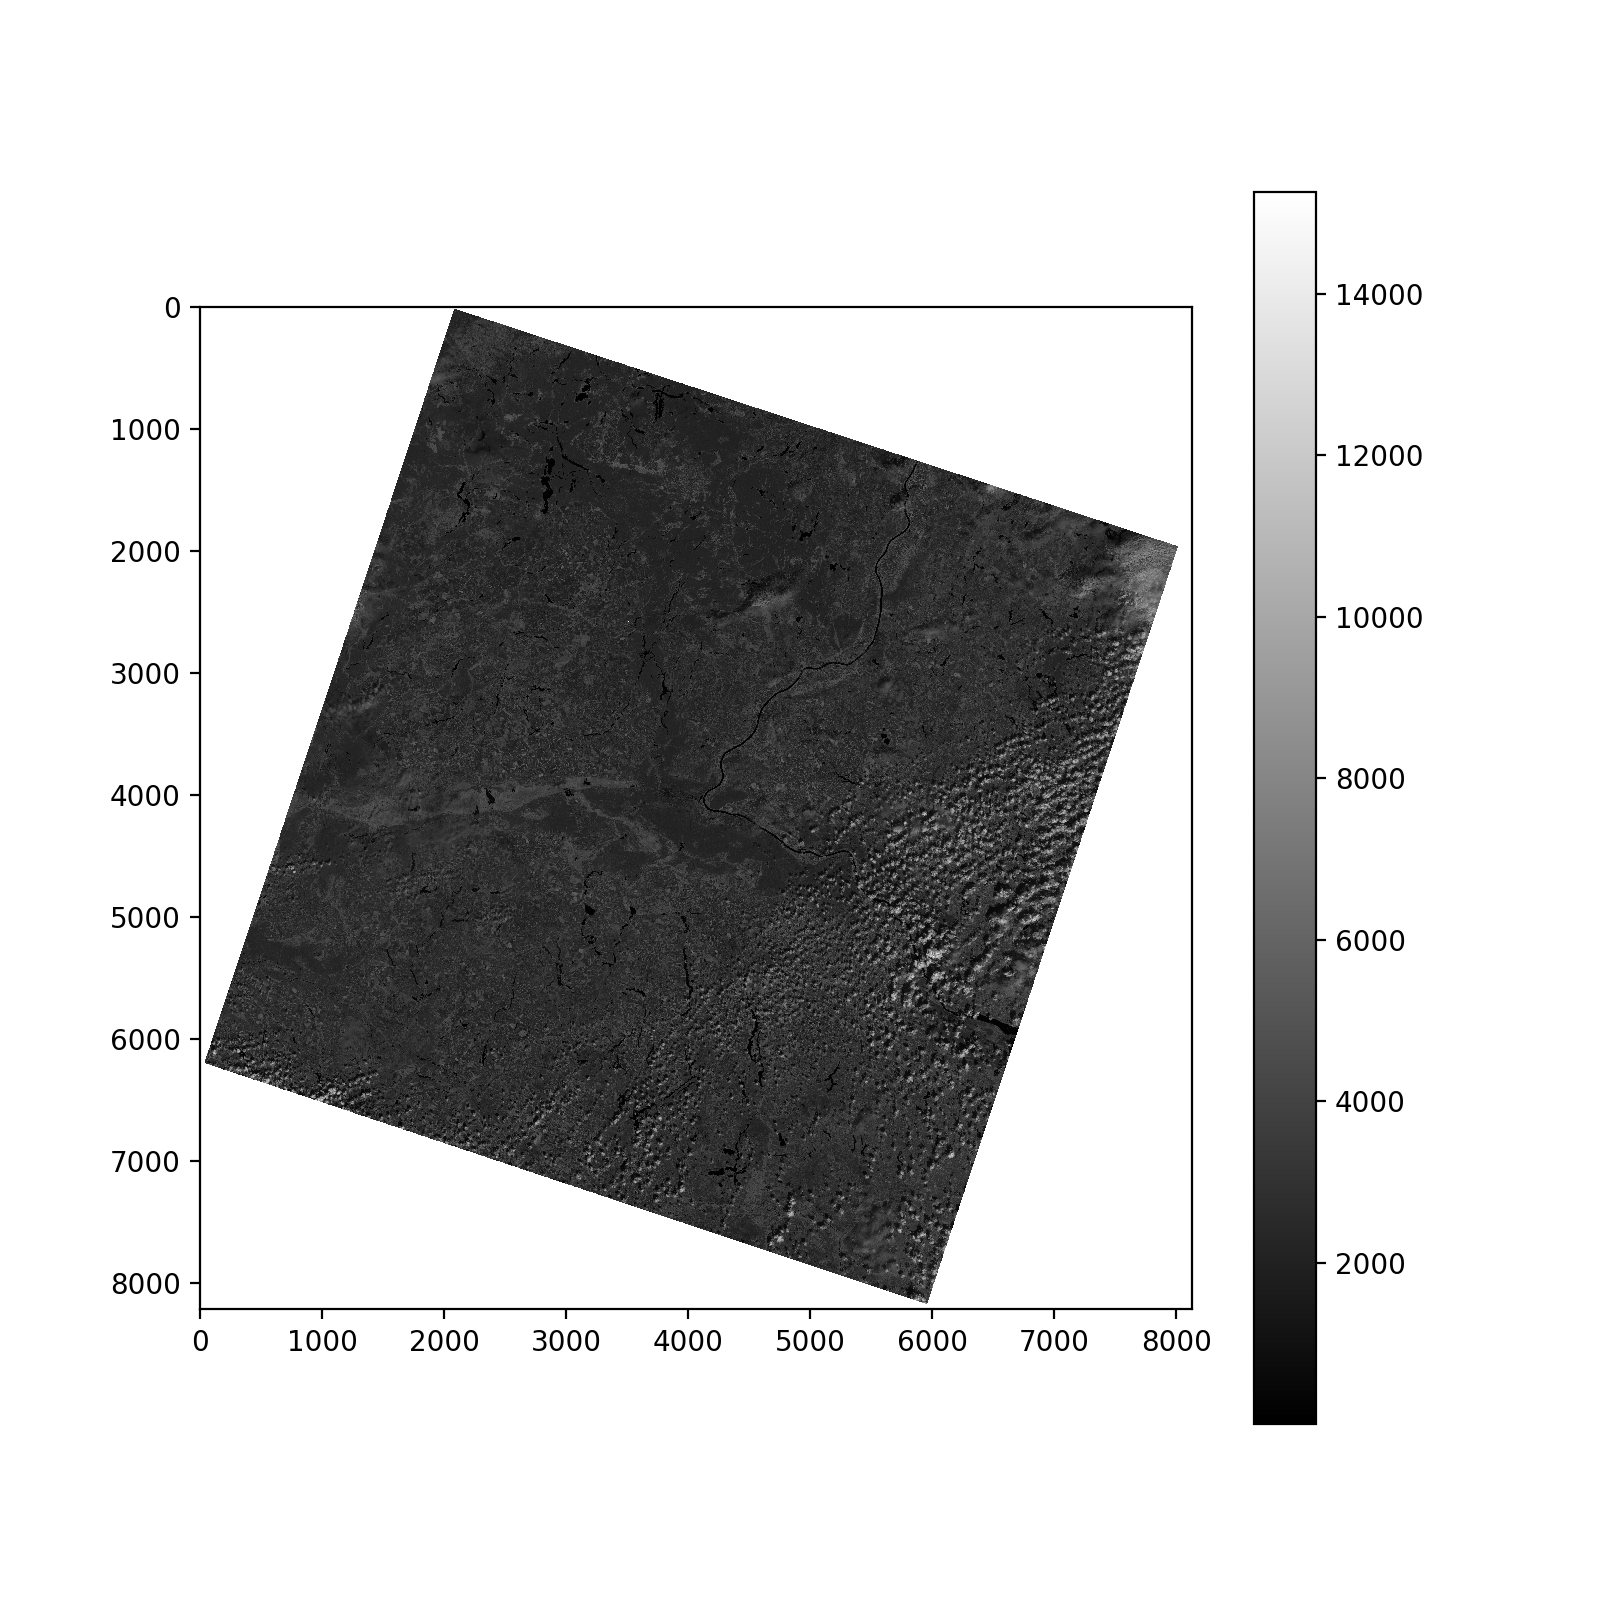

In [3]:
# Read raster data and get crs

with rio.open('data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band5.tif') as f:
    band = f.read(1)
    band_crs = f.crs
    
show_band(band)

In [9]:
print('Band coordinate reference system is: {} \nBand WKT: {}'.format(
    band_crs,
    band_crs.wkt))

Band coordinate reference system is: CRS({'init': 'epsg:32634'}) 
Band WKT: PROJCS["WGS 84 / UTM zone 34N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32634"]]


In [92]:
# Vector - show and get crs
vector_file = 'data/powiat_chojnicki.shp'
with fio.open(vector_file, 'r') as masking_region:
    geometry = [feature["geometry"] for feature in masking_region]
    properties = [feature['properties'] for feature in masking_region]
    mask_crs = masking_region.crs
    mask_schema = masking_region.schema

<open Collection 'data/powiat_chojnicki.shp:powiat_chojnicki', mode 'r' at 0x120bca8d0>


In [91]:
a

<closed Collection 'data/powiat_chojnicki.shp:powiat_chojnicki', mode 'r' at 0x11cc80da0>

In [78]:
coordinates_list = geometry[0]['coordinates'][0]
coordinates_array = np.asarray(coordinates_list)

<IPython.core.display.Javascript object>


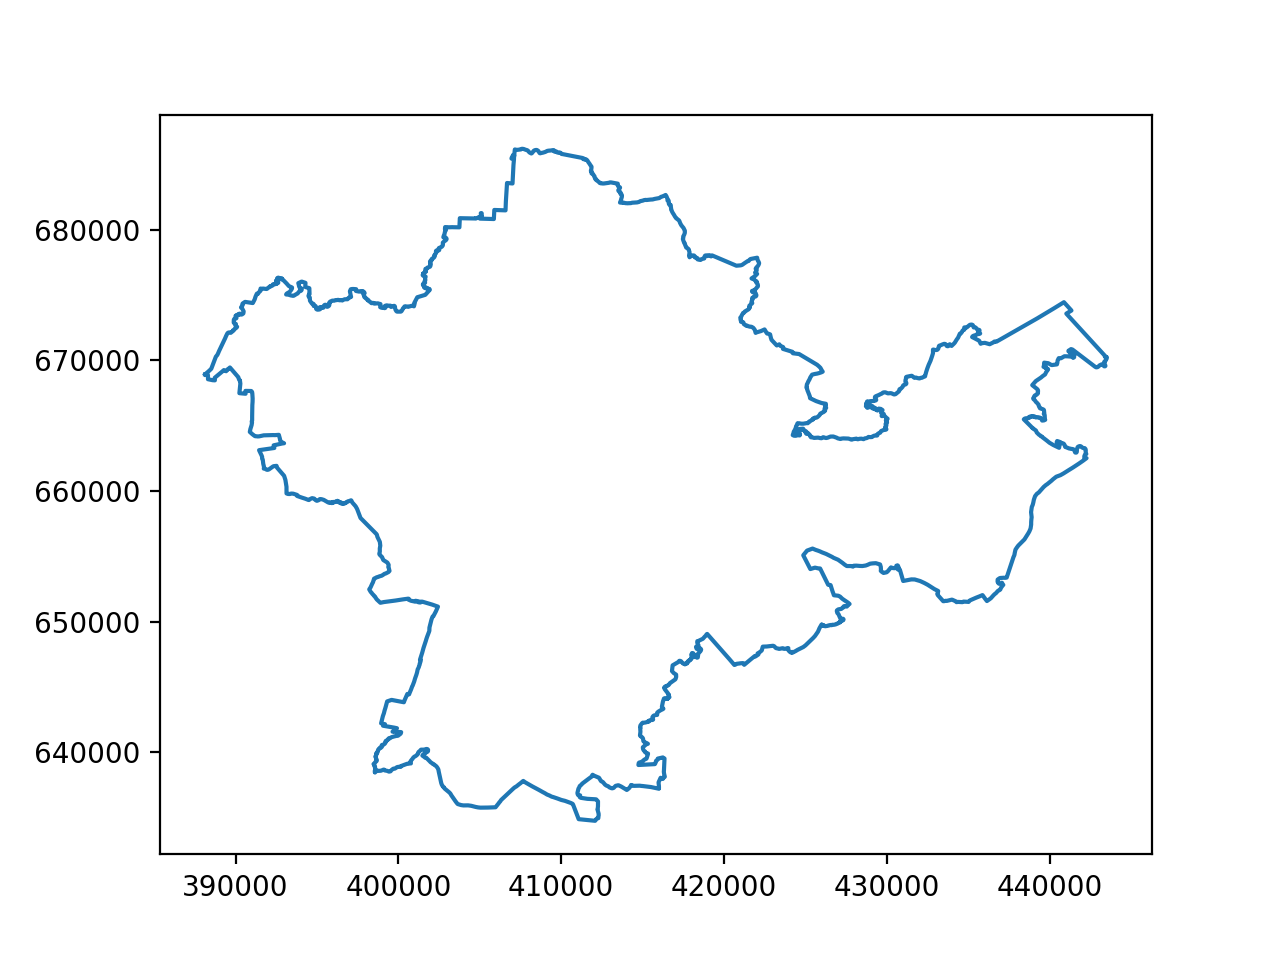

In [6]:
plt.figure()
plt.plot(coordinates_array[:, 0], coordinates_array[:, 1])
plt.show()

In [25]:
# Reprojekcja wektora

destination_epsg = band_crs['init'][5:]
destination_epsg = int(destination_epsg)
destination_crs = from_epsg(destination_epsg)
band_crs

CRS({'init': 'epsg:32634'})

In [10]:
mask_crs

{'ellps': 'GRS80',
 'k': 0.9993,
 'lat_0': 0,
 'lon_0': 19,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 500000,
 'y_0': -5300000}

In [11]:
proj_crs_in = Proj(mask_crs)
proj_crs_out = Proj(init = destination_crs['init'])

In [94]:
def project_geometry(geometry, source_projection, destination_projection):
    projected_g = []
    for g in geometry:
        transformed = transform(source_projection, destination_projection, g[0], g[1])
        points = (transformed[0], transformed[1],)
        projected_g.append(points)
    geometry_dict = {'coordinates': [projected_g], 'type': 'Polygon'}
    return geometry_dict


pg = project_geometry(coordinates_array, proj_crs_in, proj_crs_out)

In [95]:
geometry[0]

{'coordinates': [[(388129.127058072, 668916.9445930477),
   (388273.8037739565, 669083.827596304),
   (388324.84043881553, 669127.5603108285),
   (388380.9082825936, 669202.7095811823),
   (388447.7641801448, 669275.8974336041),
   (388486.931653477, 669332.8223183099),
   (388510.9104451599, 669356.8045366183),
   (388575.42463616, 669571.5791702736),
   (388598.878950025, 669661.1527275508),
   (388629.5195562422, 669750.6649228092),
   (388790.0438385325, 670273.6425060667),
   (388880.5290304578, 670411.9409393212),
   (388931.891271818, 670544.6735178409),
   (388983.8970919901, 670699.6481479751),
   (389178.3527699966, 671205.9130778182),
   (389196.54790273344, 671259.9448412582),
   (389259.78724083694, 671418.3094903817),
   (389360.7780453092, 671689.1066367365),
   (389408.65428029926, 671841.8502249261),
   (389412.25512036105, 671843.4287854629),
   (389453.9213403141, 671944.2606644034),
   (389493.2821438882, 672049.6032640329),
   (389543.6078875083, 672118.0458304696)

In [96]:
pg

{'coordinates': [[(256643.61327481957, 5975720.159027101),
   (256793.07123088284, 5975883.035839203),
   (256845.3670782327, 5975925.348095055),
   (256903.58366135287, 5975998.949718803),
   (256972.53802968364, 5976070.284319522),
   (257013.33159416445, 5976126.130121434),
   (257037.99899612227, 5976149.446555263),
   (257108.6089644655, 5976362.501060165),
   (257134.60397664047, 5976451.454676324),
   (257167.78697317286, 5976540.143939244),
   (257343.1569291131, 5977058.835451854),
   (257437.59079635388, 5977194.6436973605),
   (257492.72607242127, 5977325.988337551),
   (257549.13347437294, 5977479.567302577),
   (257757.98009006443, 5977980.578677651),
   (257777.70994693032, 5978034.1219711965),
   (257845.4522040007, 5978190.774972365),
   (257954.13960090026, 5978458.846957126),
   (258006.35292121037, 5978610.310034475),
   (258010.000044953, 5978611.78762328),
   (258054.53410623988, 5978711.4899501065),
   (258096.8891113287, 5978815.770211731),
   (258149.17187520515

In [97]:
powiat_chojnicki = {}
powiat_chojnicki['geometry'] = pg
powiat_chojnicki['properties'] = properties[0]
mask_schema

{'geometry': 'Polygon',
 'properties': OrderedDict([('NAME_PL', 'str:254'), ('ID', 'int:10')])}

In [98]:
destination_schema = mask_schema

In [99]:
destination_driver = 'ESRI Shapefile'
destination_crs

{'init': 'epsg:32634', 'no_defs': True}

In [100]:
with fio.open(
    'new.shp',
    'w',
    driver = destination_driver,
    crs = destination_crs,
    schema = destination_schema) as output:
    output.write(powiat_chojnicki)

In [101]:
vector_file = 'new.shp'
with fio.open(vector_file, 'r') as masking_region:
    geometry = [feature["geometry"] for feature in masking_region]

In [102]:
coordinates_list = geometry[0]['coordinates'][0] # check different cases
coordinates_array = np.asarray(coordinates_list)

<IPython.core.display.Javascript object>


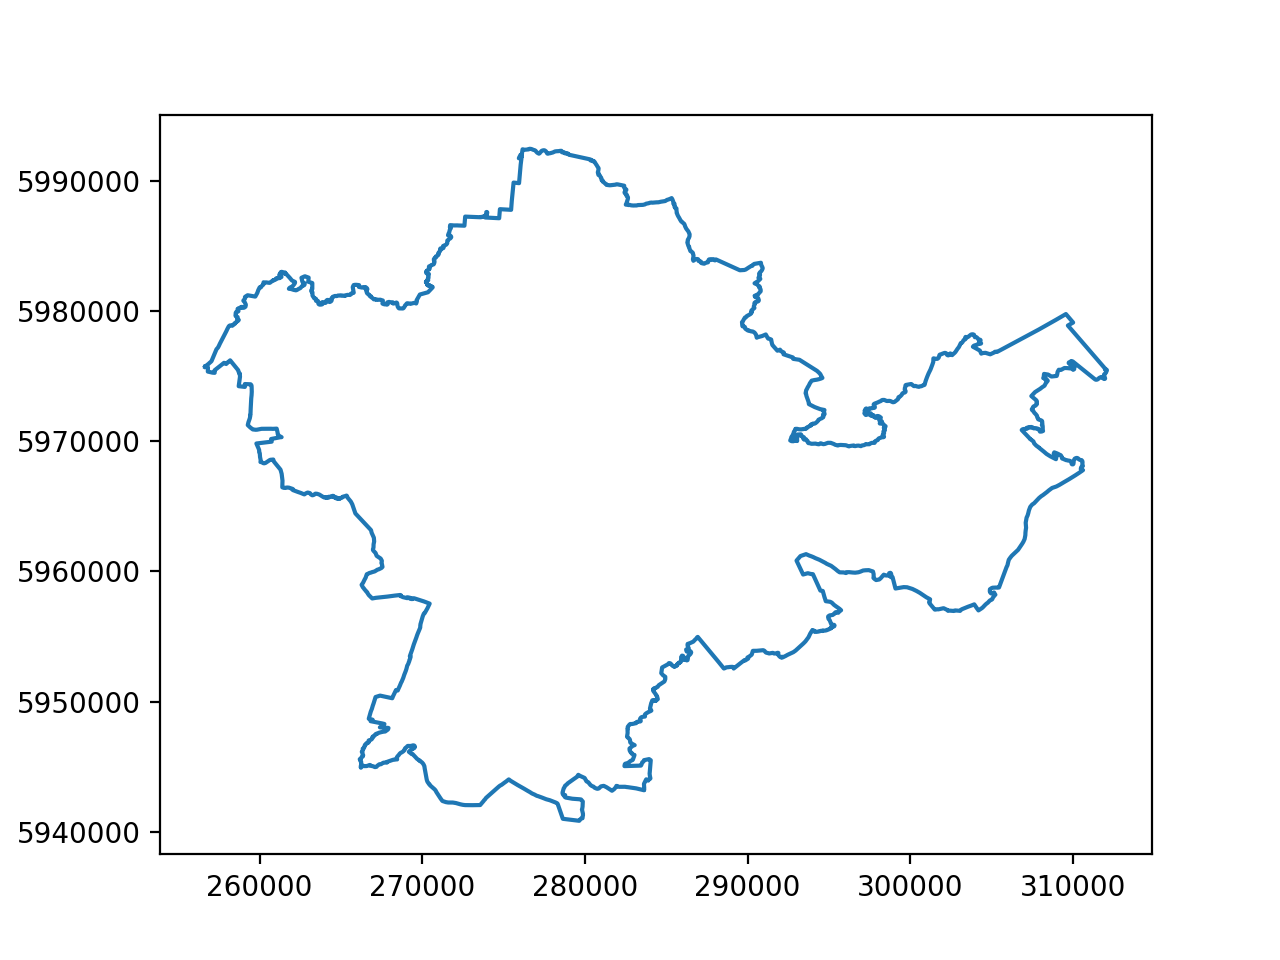

In [103]:
plt.figure()
plt.plot(coordinates_array[:, 0], coordinates_array[:, 1])
plt.show()

# After reprojection

In [2]:
# Read raster data and get crs

def get_epsg_from_raster(raster_address):
    with rio.open(raster_address) as f:
        band_crs = f.crs
        destination_epsg = band_crs['init'][5:]
        destination_epsg = int(destination_epsg)
    return destination_epsg

file_location = 'data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band5.tif'
epsg = get_epsg_from_raster(file_location)

In [3]:
class VectorData:
    
    def __init__(self, filename):
        self.v_file = filename
        self.geometry = {}
        self.properties = None
        self.vec_crs = None
        self.vec_schema = None
        
    def get_vector_data(self, parameters='all', write_params=True):
        """input 1: parameters (string)
        parameters: 'all', 'none', 'geometry', 'properties', 'crs', 'schema'
        'all': returns tuple with geometry, properties, crs and schema;
        'none': does not return anything;
        'geometry', 'properties', 'crs' or 'schema': returns chosen parameter.
        input 2: write_params (bool)
        write_params: True, False
        True: store all parameters in the object
        False: do not store anything in the object
        output: chosen parameters as a dict"""
        
        with fio.open(vector_file, 'r') as masking_region:
            geometry = [feature["geometry"] for feature in masking_region]
            properties = [feature['properties'] for feature in masking_region]
            vec_crs = masking_region.crs
            vec_schema = masking_region.schema
        
        if write_params:
            print('--- Object geometry, properties, crs and schema updated ---')
            self.geometry = geometry
            self.properties = properties
            self.vec_crs = vec_crs
            self.vec_schema = vec_schema
        else:
            print('--- Object parameters not updated ---')
            
        output_dict = {'all': ({'geometry': geometry, 'properties': properties, 'crs': vec_crs, 'scheme': vec_schema}),
                      'none': 0,
                      'geometry': geometry,
                      'properties': properties,
                      'crs': vec_crs,
                      'schema': vec_schema}
        try:
            return output_dict[parameters]
        except KeyError:
            raise KeyError("Parameter not available. Available parameters: 'all', 'none', 'geometry', 'properties', 'crs', 'schema'")
      
    def reproject_geometry(self, destination_epsg, update=False):
        try:
            destination_crs = from_epsg(destination_epsg)
            proj_crs_in = Proj(self.vec_crs)
            coordinates_list = self.geometry[0]['coordinates'][0]
        except RuntimeError:
            raise ValueError('Given EPSG is wrong or it is not stored in fiona to run from_epsg method')
        except KeyError:
            raise ValueError('You must update your object parameters by get_vector_data method with write_params set to True.')
        proj_crs_out = Proj(init = destination_crs['init'])
        coordinates_array = np.asarray(coordinates_list)
        projected_g = []
        
        for g in coordinates_array:
            transformed = transform(proj_crs_in, proj_crs_out, g[0], g[1])
            points = (transformed[0], transformed[1],)
            projected_g.append(points)
        geometry_dict = {'coordinates': [projected_g], 'type': 'Polygon'}
        
        if update:
            self.geometry = [geometry_dict]
            
        return [geometry_dict]
    
    def show_vector_data(self, geometry=None):
        if geometry:
            g = geometry
        else:
            g = self.geometry
            
        try:
            coordinates_list = g[0]['coordinates'][0]
        except KeyError:
            raise ValueError(
                'Geometry is not defined. Please, update geometry with get_vector_data method or provide valid geometry object to the method.')
            
        coordinates_array = np.asarray(coordinates_list)
        plt.figure()
        plt.plot(coordinates_array[:, 0], coordinates_array[:, 1])
        plt.show()

--- Object geometry, properties, crs and schema updated ---


<IPython.core.display.Javascript object>


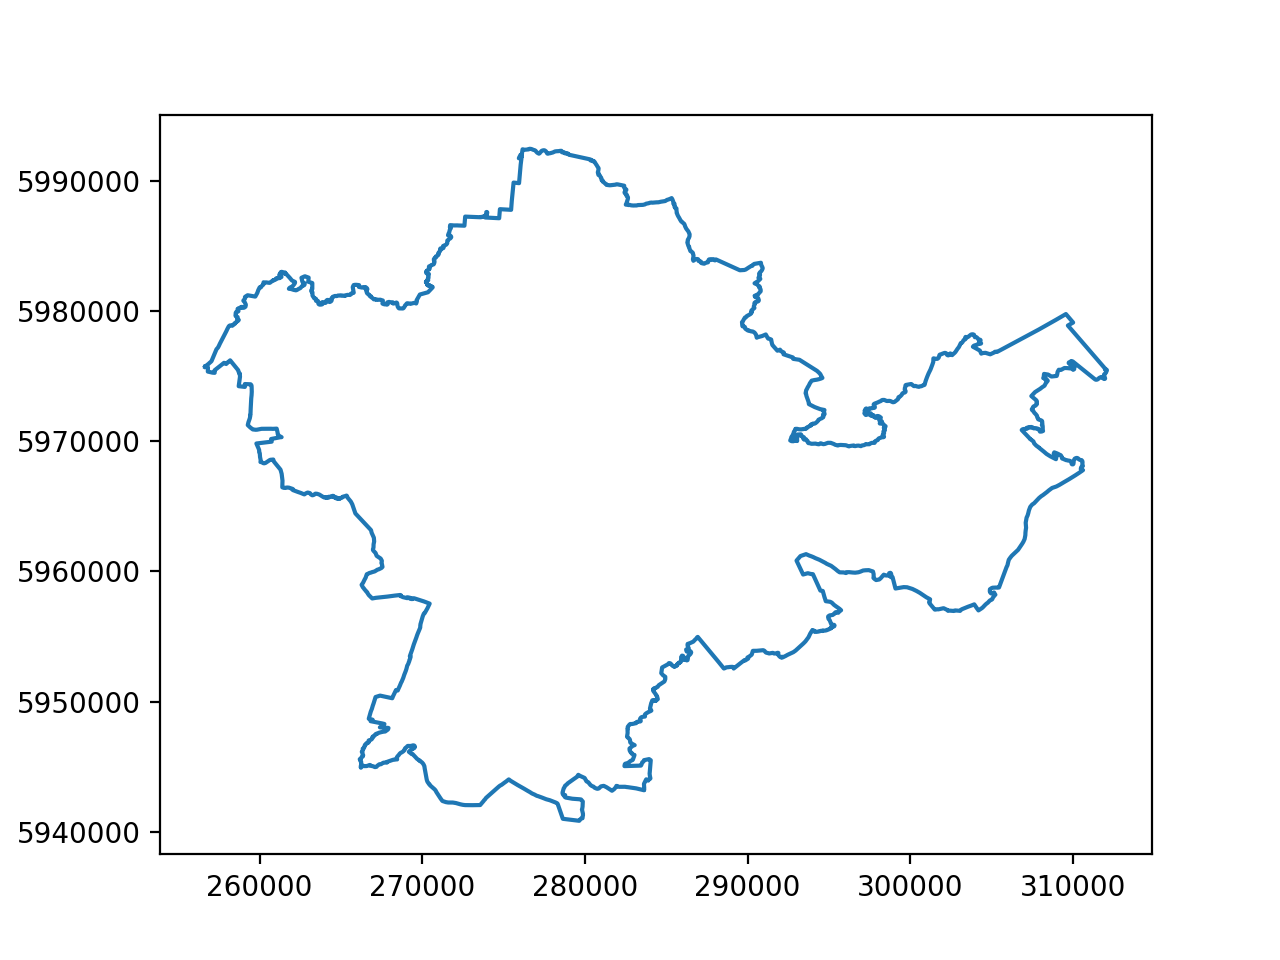

In [5]:
vector_file = 'data/powiat_chojnicki.shp'
vector_data = VectorData(vector_file)
vector_data.get_vector_data('geometry', True)
new_geometry = vector_data.reproject_geometry(epsg, True)
vector_data.show_vector_data()

<IPython.core.display.Javascript object>


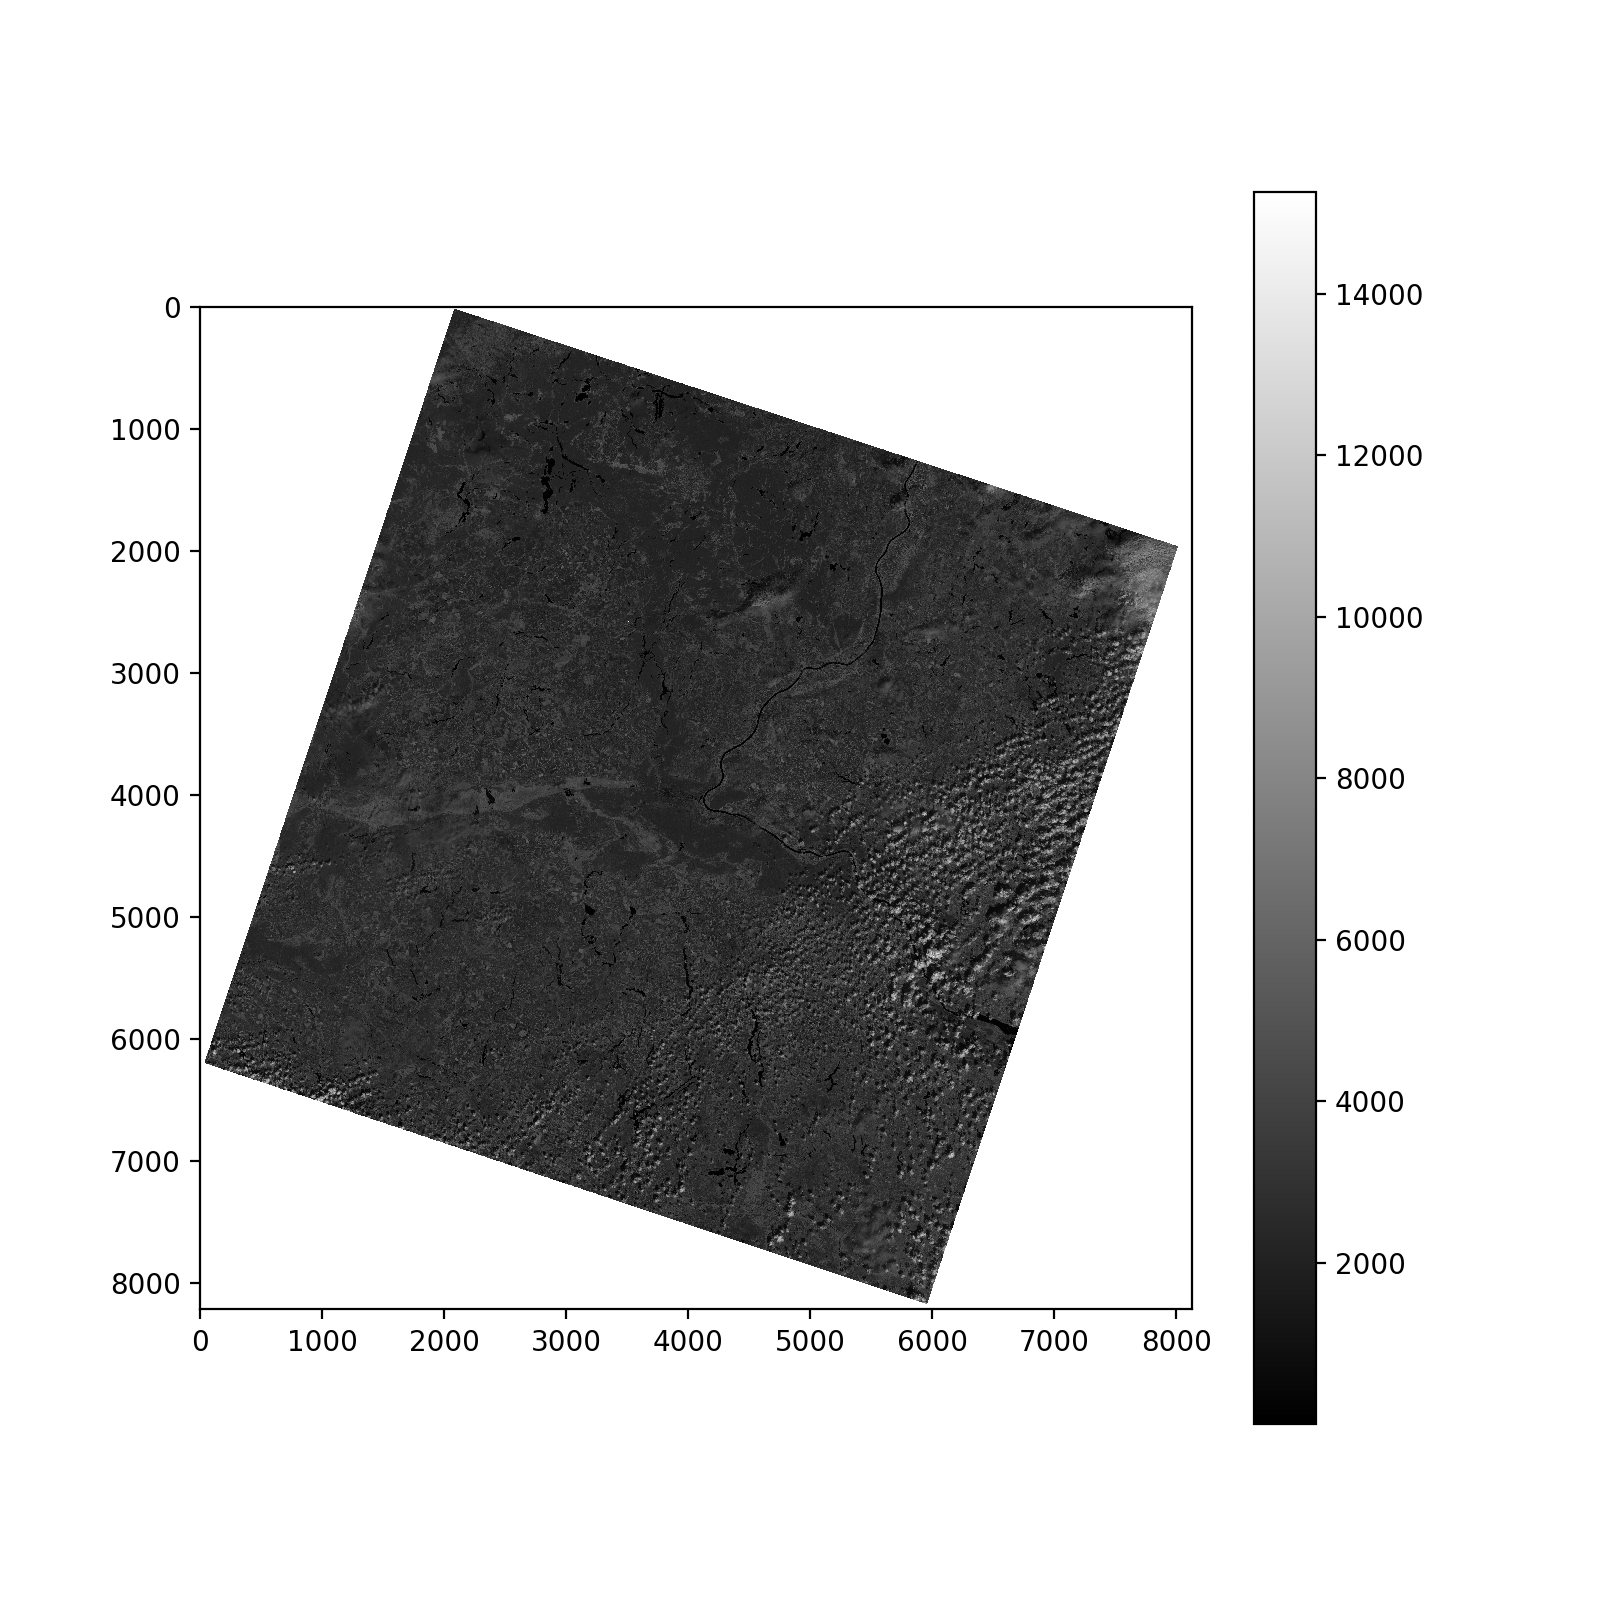

In [7]:
with rio.open('data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band5.tif') as f:
    band = f.read(1)
    band_crs = f.crs
    
show_band(band)

In [12]:
# Clip to given area
import rasterio.mask as rmask

def clip_area(vector_geometry, raster_file, save_image_to):

    with rio.open(raster_file, 'r') as raster_source:
        clipped_image, transform = rmask.mask(raster_source, vector_geometry, crop=True)
        metadata = raster_source.meta.copy()
        
    metadata.update({"driver": "GTiff",
                 "height": clipped_image.shape[1],
                 "width": clipped_image.shape[2],
                 "transform": transform})
    with rio.open(save_image_to, "w", **metadata) as g_tiff:
        g_tiff.write(clipped_image)

In [13]:
clip_area(new_geometry, 'data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band5.tif',
         'clipped.tif')

<IPython.core.display.Javascript object>


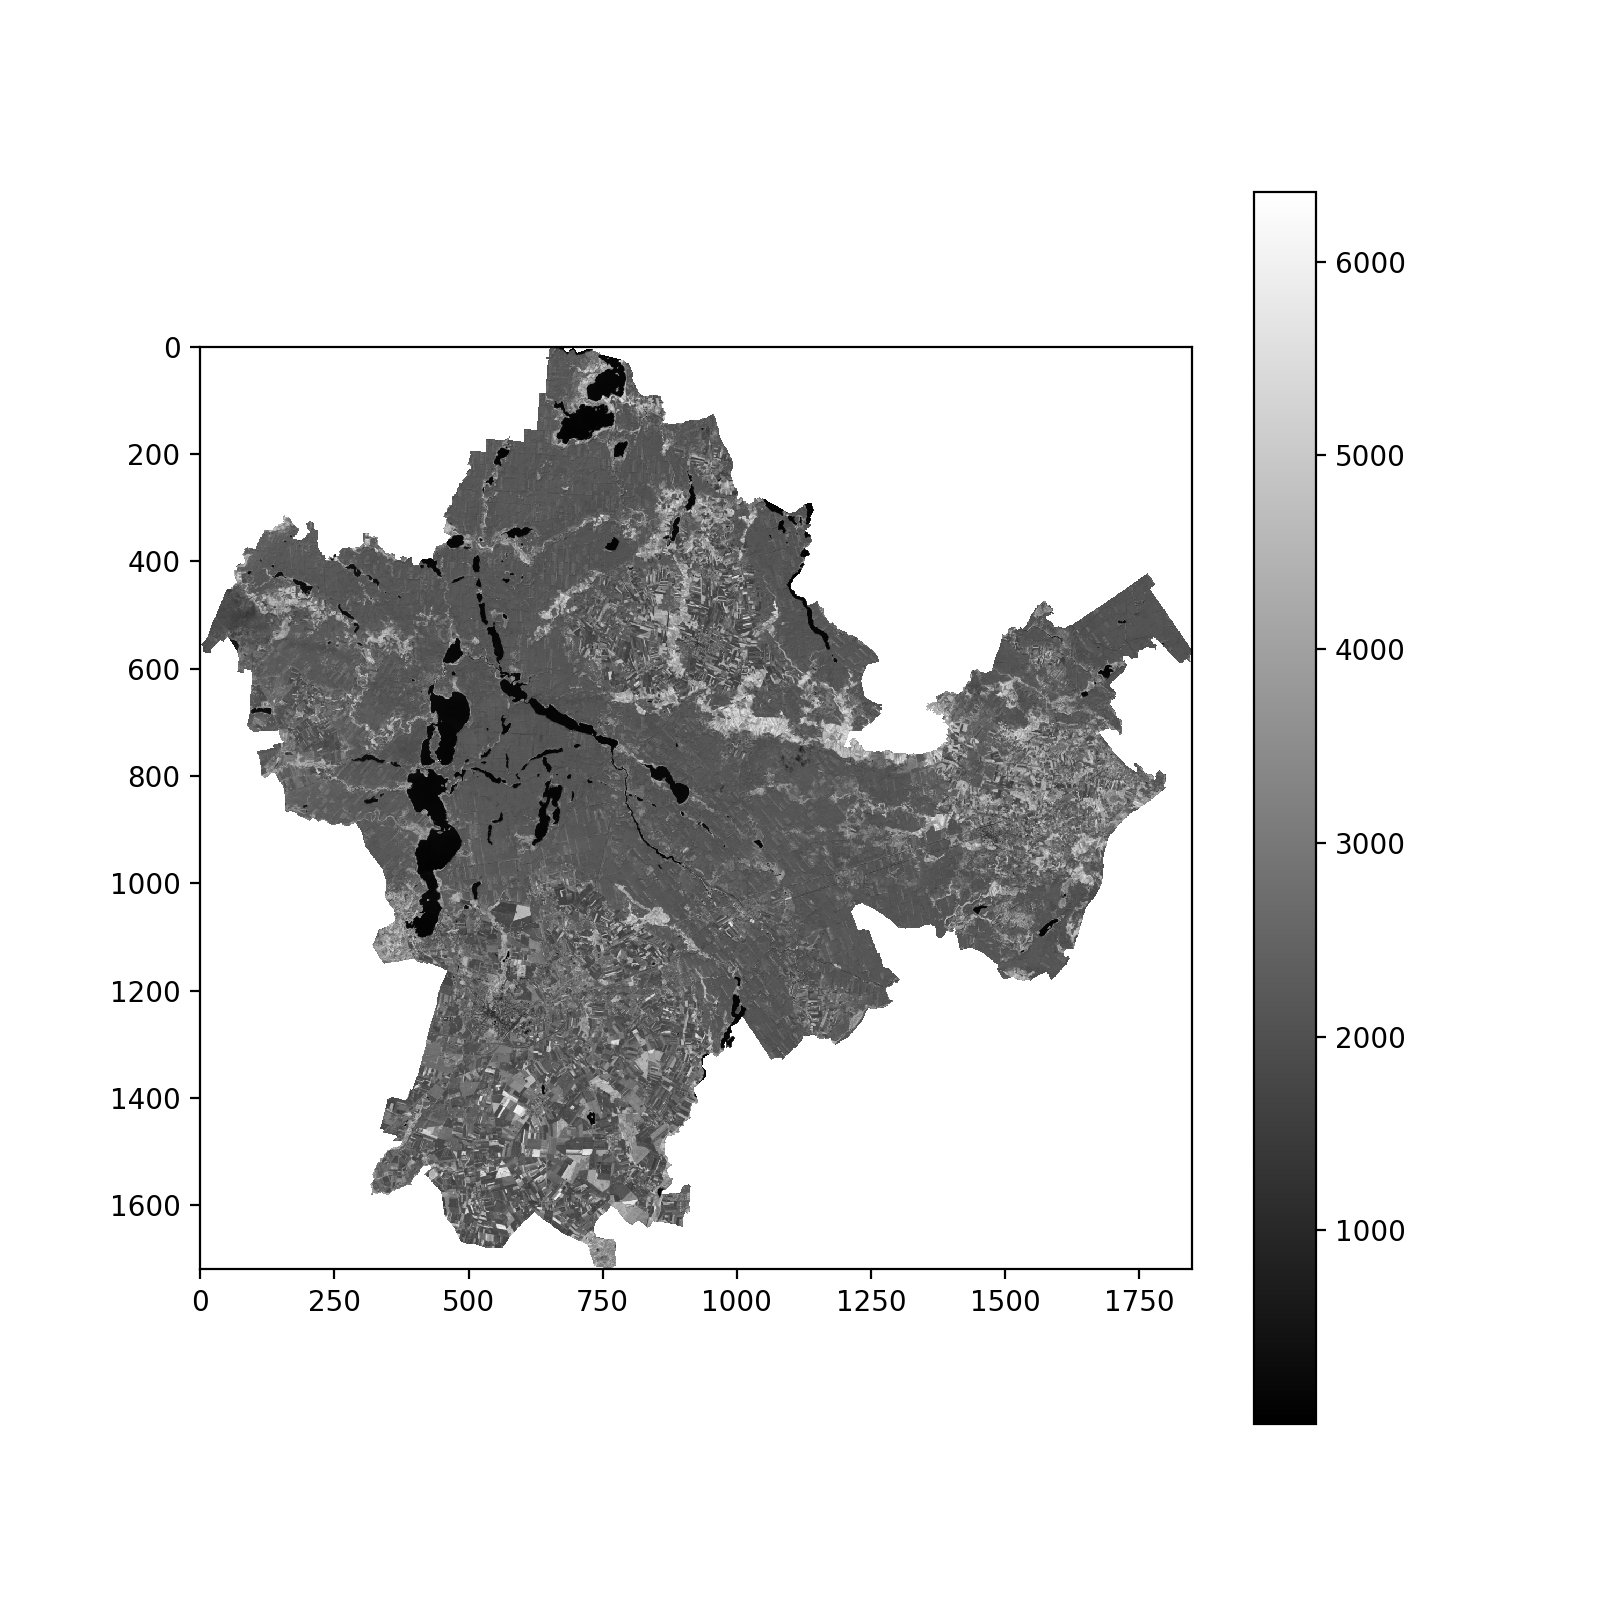

In [14]:
with rio.open('clipped.tif') as f:
    band = f.read(1)
    band_crs = f.crs
    
show_band(band)

In [17]:
import os
def read_landsat_images(folder_name):
    """Funkcja zwraca słownik (dict) z parami NUMER KANAŁU: ścieżka_do_pliku
    return: {numer_kanalu: sciezka_do_pliku}"""
    file_list = os.listdir(folder_name)
    channel_list = []
    for f in file_list:
        if (f.startswith('LC') and f.endswith('.tif')):
            if 'band' in f:
                channel_list.append(folder_name + f)             
    channel_list.sort()
    channel_numbers = np.arange(1, 8)
    bands_dictionary = dict(zip(channel_numbers, channel_list))
    return bands_dictionary

In [20]:
images_list = read_landsat_images('data/LC081900232013080501T1-SC20180517172727/')

In [21]:
images_list

{1: 'data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band1.tif',
 2: 'data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band2.tif',
 3: 'data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band3.tif',
 4: 'data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band4.tif',
 5: 'data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band5.tif',
 6: 'data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band6.tif',
 7: 'data/LC081900232013080501T1-SC20180517172727/LC08_L1TP_190023_20130805_20170503_01_T1_sr_band7.tif'}

In [22]:
# Calculate EVI, needed bands: 5, 4, 2

# Prepare clipped files
clipped_folder = 'data/'
for band in images_list:
    destination = clipped_folder + 'LC_clipped_band' + str(band) + '.tif'
    clip_area(new_geometry, images_list[band], destination)

In [23]:
clipped_imgs = read_landsat_images('data/')

In [24]:
clipped_imgs

{1: 'data/LC_clipped_band1.tif',
 2: 'data/LC_clipped_band2.tif',
 3: 'data/LC_clipped_band3.tif',
 4: 'data/LC_clipped_band4.tif',
 5: 'data/LC_clipped_band5.tif',
 6: 'data/LC_clipped_band6.tif',
 7: 'data/LC_clipped_band7.tif'}

In [33]:
def calculate_index(index_name, landsat_8_bands):
    indexes = {
        'ndvi': (5, 4),
        'evi': (5, 4, 2),
        'ndbi': (6, 5),
        'ndwi': (3, 6),
    }
    
    # Magiczne 10000 przez które dzielone są piksele poszczególnych obrazów
    # to maksymalna wartość pikseli w produktach poziomu 2 satelity Landsat 8
    
    if index_name in indexes:
        if index_name != 'evi':
            bands = indexes[index_name]

            with rio.open(landsat_8_bands[bands[0]]) as a:
                band_a = (a.read()[0]/10000).astype(np.float)
            with rio.open(landsat_8_bands[bands[1]]) as b:
                band_b = (b.read()[0]/10000).astype(np.float)

            numerator = band_a - band_b
            denominator = band_a + band_b

            idx = numerator / denominator
            idx[idx > 1] = 1
            idx[idx < -1] = -1
            return idx
        else:
            bands = indexes[index_name]
            
            with rio.open(landsat_8_bands[bands[0]]) as a:
                nir_band = (a.read()[0]/10000).astype(np.float)
            with rio.open(landsat_8_bands[bands[1]]) as b:
                r_band = (b.read()[0]/10000).astype(np.float)
            with rio.open(landsat_8_bands[bands[2]]) as c:
                b_band = (c.read()[0]/10000).astype(np.float)
                
            numerator = nir_band - r_band
            g = 2.5
            c1 = 6
            c2 = 7.5
            l = 1
            denominator = nir_band + c1 * r_band - c2 * b_band + l
            evi = g * (numerator / denominator)
            evi[evi > 1] = 1
            evi[evi < -1] = -1
            return evi
    else:
        raise ValueError('Brak wskaźnika do wyboru, dostępne wskaźniki to ndbi, ndvi i ndwi')

In [34]:
my_evi = calculate_index('evi', clipped_imgs)

<IPython.core.display.Javascript object>


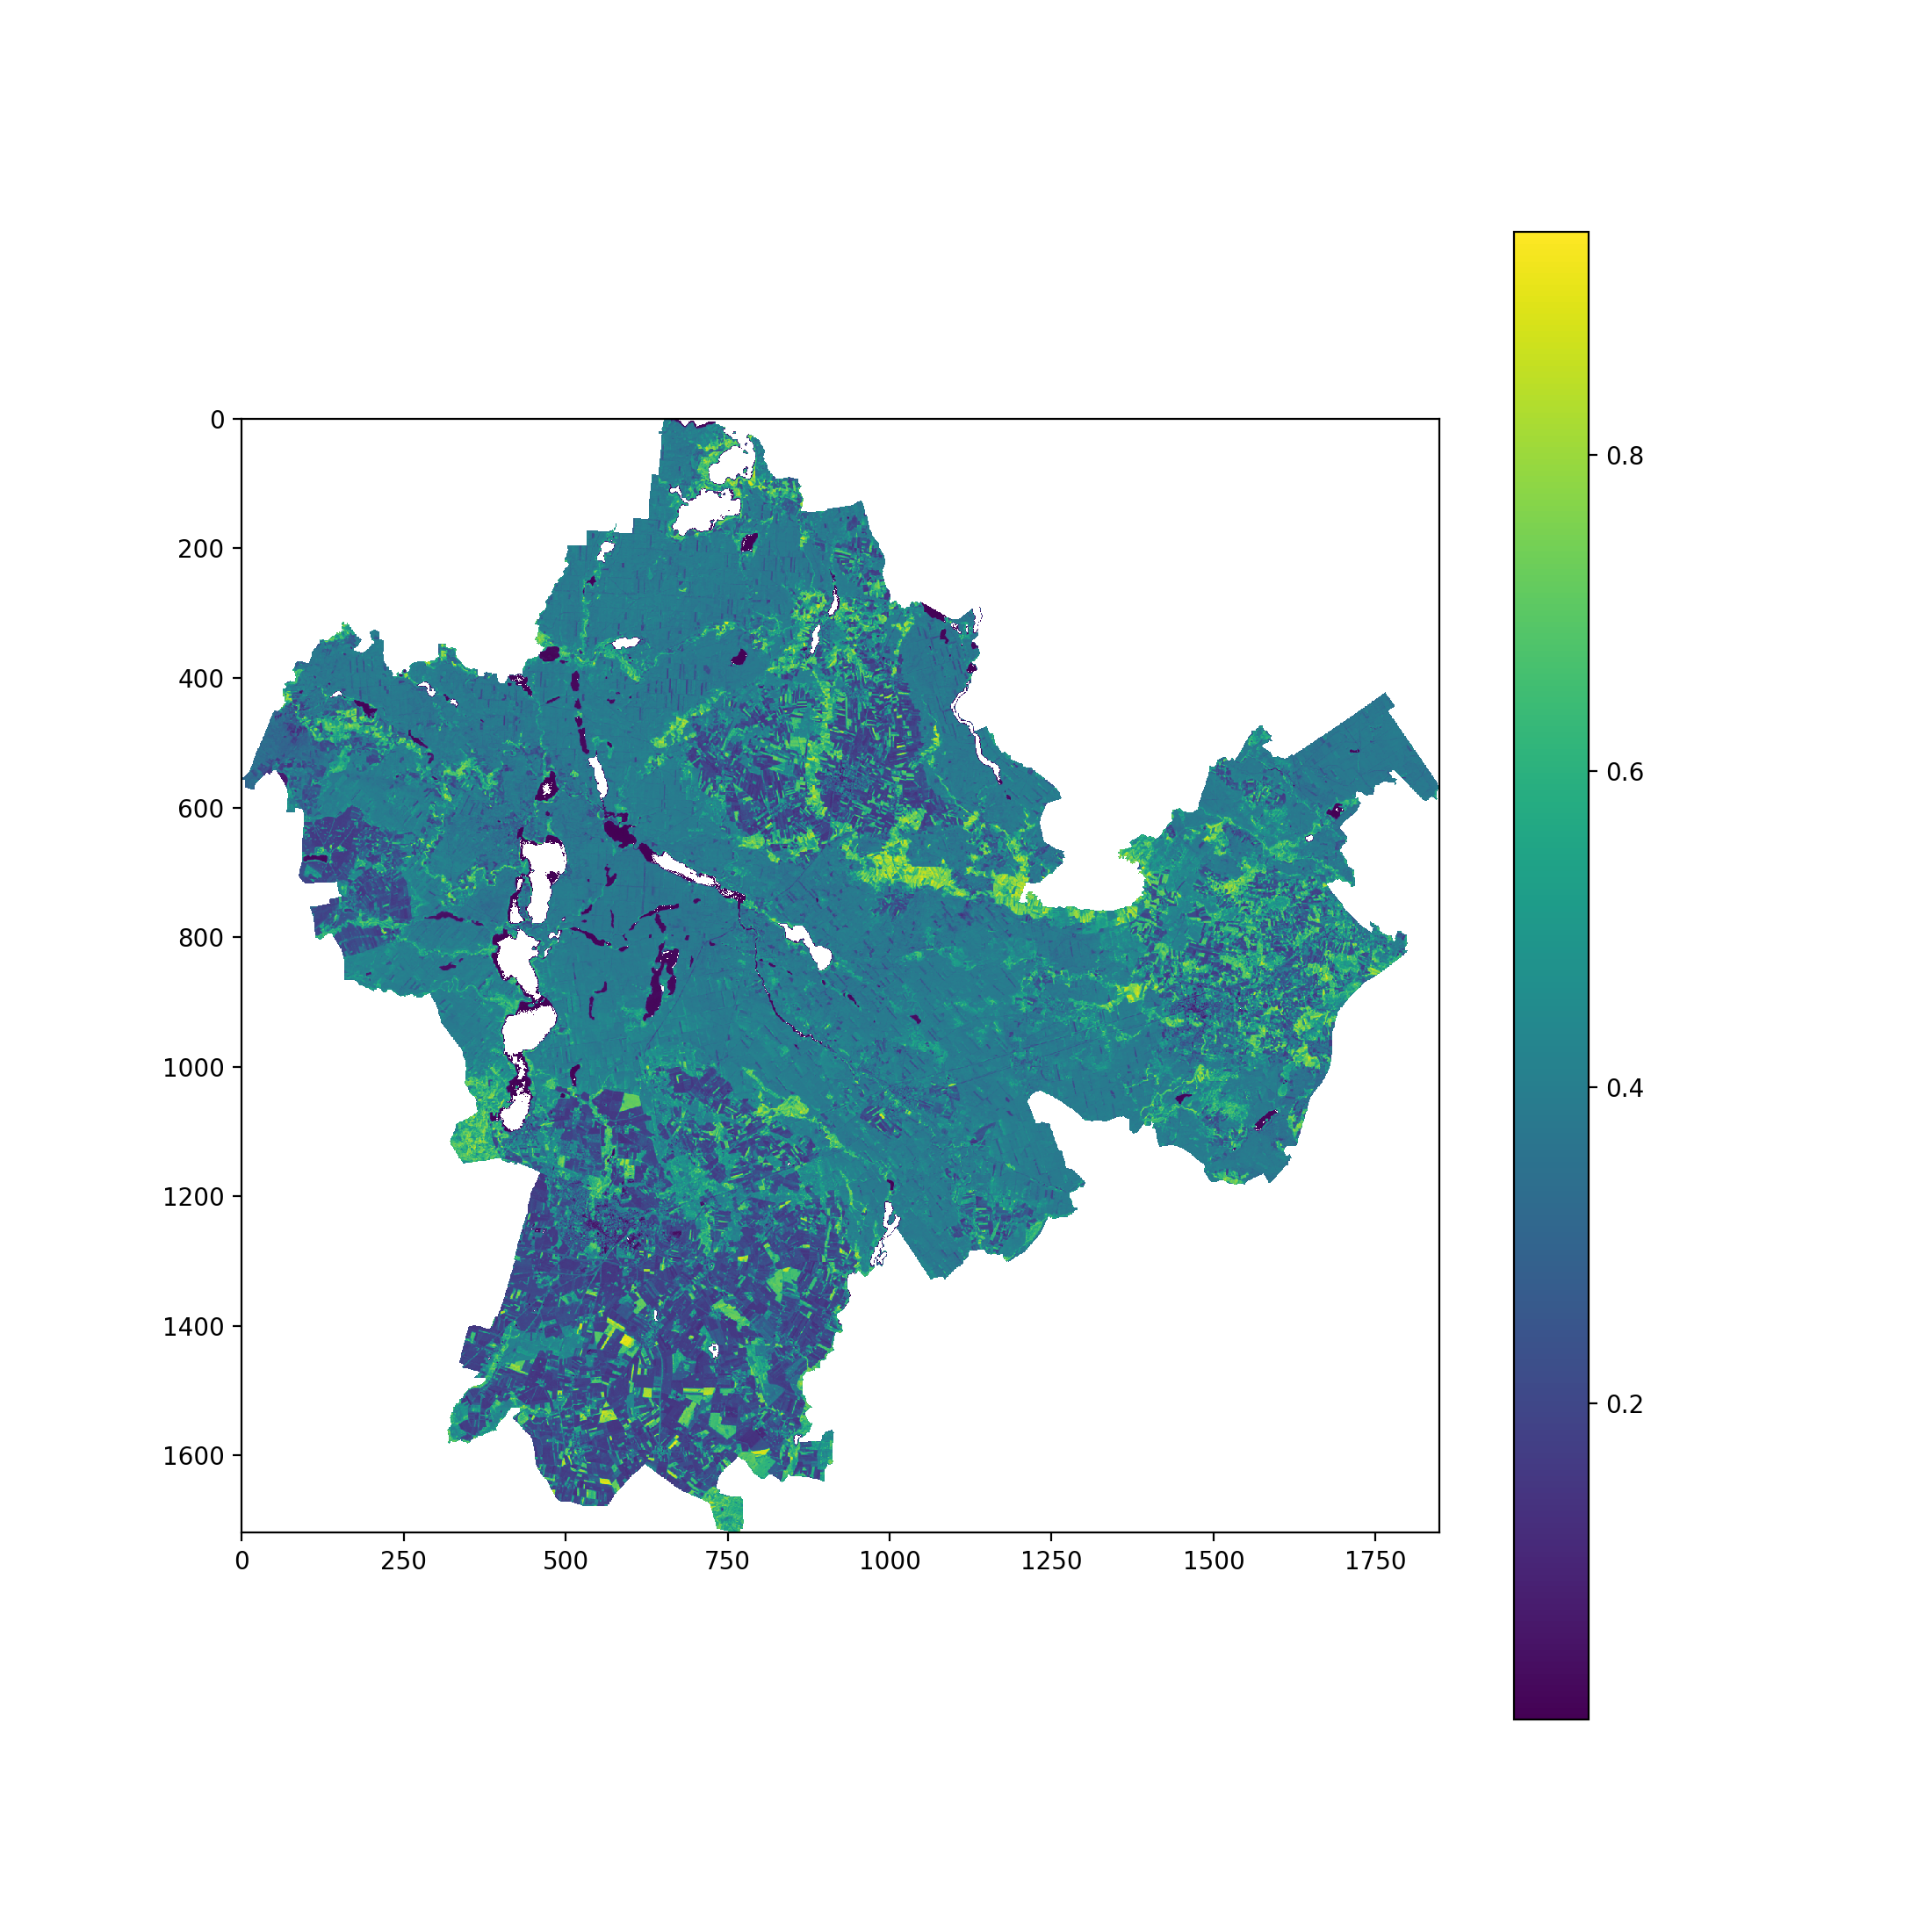

In [39]:
show_band(my_evi, color_map='viridis', remove_negative=True)

In [40]:
my_ndvi = calculate_index('ndvi', clipped_imgs)

<IPython.core.display.Javascript object>


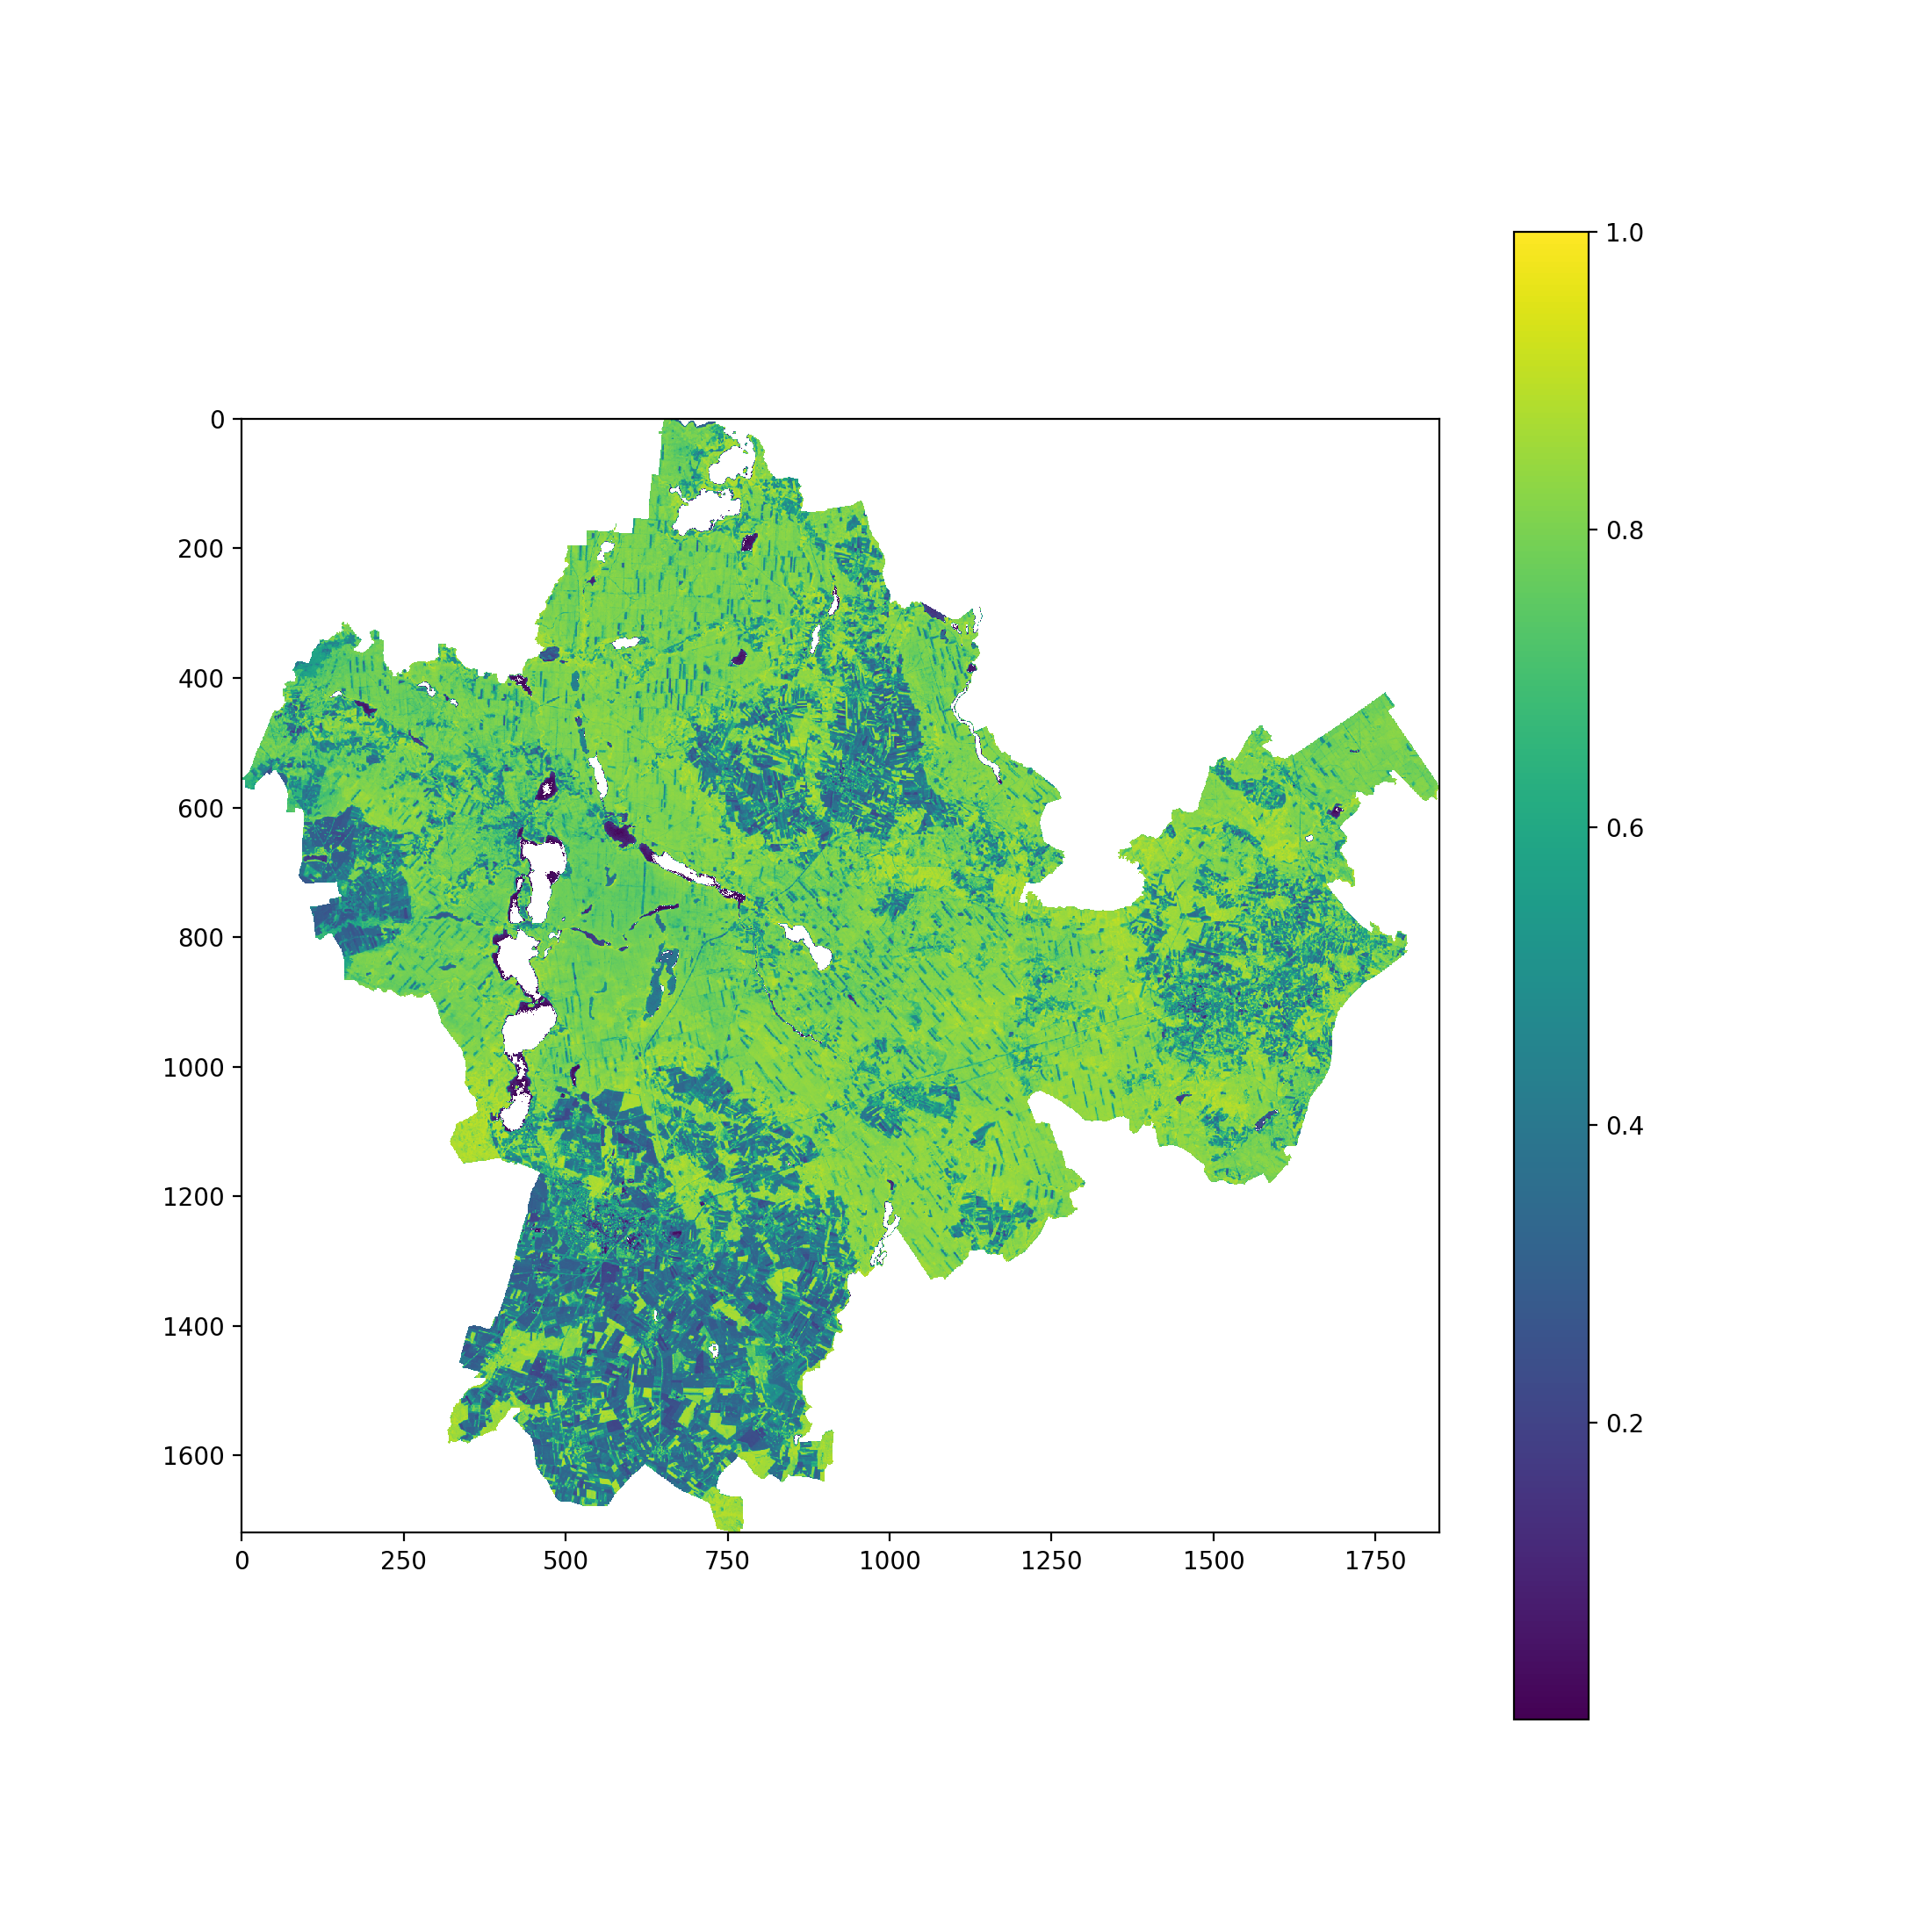

In [42]:
show_band(my_ndvi, color_map='viridis', remove_negative=True)